# LAB06 Assigment




### Exercise 1 Linear Discriminant Analysis from Scratch using numpy (50 points )
- <font size=4> Complete the missing code in the LDA class below<font>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class LDA:
    #n_components:Number of components (<= min(n_classes - 1, n_features)) for dimensionality reduction.
    def __init__(self, n_components=None):
        
        self.n_components = n_components
        self.eigenvalues = None
        self.eigenvectors = None

    def fit(self, X, y):
        if self.n_components is None or self.n_components > X.shape[1]:
            n_components = X.shape[1]
        else:
            n_components = self.n_components
       
        n_features = np.shape(X)[1]
        labels = np.unique(y)
  
        # Within class scatter matrix
        # Complete code for calculating S_W
        ########### Write Your Code Here ###########
        S_W = np.zeros((n_features, n_features), dtype=float)
        for label in labels:
            X_i = X[y == label]
            u_i = X_i.mean(axis=0)
            S_W +=  ((X_i - u_i).T) @ (X_i - u_i)

        # Between class scatter matrix
        # Complete code for calculating S_W
        ########### Write Your Code Here ###########
        S_B = np.zeros((n_features, n_features), dtype=float)
        u = X.mean(axis=0)
        for label in labels:
            X_i = X[y == label]
            u_i = X_i.mean(axis=0)
            N_i = X_i.shape[0]
            S_B += N_i * np.outer((u_i - u), (u_i - u))
      
        # Determine SW^-1 * SB by calculating inverse of SW
        ########### Write Your Code Here ###########
        O = np.linalg.inv(S_W) @ S_B

        # Get eigenvalues and eigenvectors of SW^-1 * SB
        ########### Write Your Code Here ###########
        eigenvalues, eigenvectors = np.linalg.eig(O)

        # Sort the eigenvalues and corresponding eigenvectors from largest
        # to smallest eigenvalue and select the first n_components
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx][:n_components]
        eigenvectors = eigenvectors[:, idx][:, :n_components]
  
        self.eigenvalues = eigenvalues
        self.eigenvectors = eigenvectors
  
    def fit_transform(self, X, y):
        ########### Write Your Code Here ###########
        self.fit(X, y)
        return self.transform(X)  
  
    def transform(self, X):
        ########### Write Your Code Here ###########
        return X @ self.eigenvectors

- <font size=4> Dimensionality reduction visualization<font>

/tmp/ipykernel_37845/1728334634.py:40: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 12


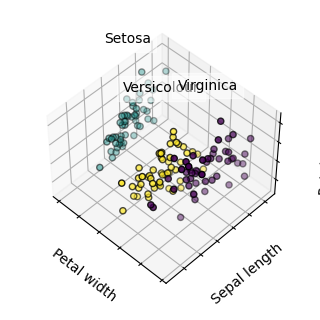

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

np.random.seed(5)


iris = datasets.load_iris()
X = iris.data
y = iris.target
pca = LDA(n_components=3)
pca.fit(X, y)
X = pca.transform(X)

fig = plt.figure(1, figsize=(4, 3))
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:    
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, 
        edgecolor='k')

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
# ax.set_title("Ground Truth")
ax.dist = 12

plt.show()

### Exercise 2 Recognize handwritten numbers with LDA (50 points ). 

Your task in this section is to recognize handwritten numbers, and you can use the linear discriminant analysis model from the Scikit-Learn library to fit, evaluate, and predict them.

<font color='red' size=4>Note that your accuracy in this section will directly determine your score.</font>

### Loading the MNIST Dataset


In [5]:
########### Write Your Code Here ###########
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
mnist = fetch_openml('mnist_784')

images = np.array(mnist.data)
labels = np.array(mnist.target)

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
############################################

/mnt/petrelfs/chenqizhi/anaconda3/envs/detect/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


###  Visualization of MINIST

(56000, 784)
(56000,)
(14000, 784)
(14000,)


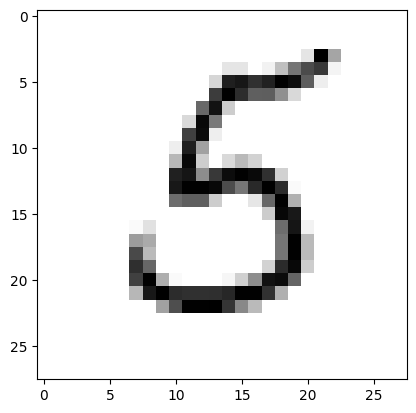

In [6]:
# Visualize MINIST
########### Write Your Code Here ###########
import matplotlib.pyplot as plt
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
plt.imshow(x_train[0].reshape(28, 28), cmap='binary')
############################################

### Fit  Model

In [28]:
########### Write Your Code Here ###########
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
params = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage':np.linspace(0.0, 1.0, 25)
}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
search = GridSearchCV(model, params, scoring='accuracy', n_jobs=-1)
results = search.fit(x_train, y_train)
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
############################################

/mnt/petrelfs/chenqizhi/anaconda3/envs/detect/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
130 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "/mnt/petrelfs/chenqizhi/anaconda3/envs/detect/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/mnt/petrelfs/chenqizhi/anaconda3/envs/detect/lib/python3.10/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/mnt/petrelfs/chenqizhi/anaconda3/envs/detect/lib/python3.10/s

Mean Accuracy: 0.874
Config: {'shrinkage': 0.41666666666666663, 'solver': 'lsqr'}


## Evaluate model

In [29]:
########### Write Your Code Here ###########
from sklearn.metrics import accuracy_score, classification_report
pred = search.best_estimator_.predict(x_test)
print('accuracy_score:', accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
############################################

accuracy_score: 0.8741428571428571
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1343
           1       0.86      0.96      0.91      1600
           2       0.91      0.82      0.86      1380
           3       0.86      0.84      0.85      1433
           4       0.86      0.89      0.87      1295
           5       0.82      0.82      0.82      1273
           6       0.92      0.92      0.92      1396
           7       0.92      0.86      0.89      1503
           8       0.82      0.80      0.81      1357
           9       0.81      0.88      0.84      1420

    accuracy                           0.87     14000
   macro avg       0.88      0.87      0.87     14000
weighted avg       0.88      0.87      0.87     14000



### Exercise 3: Qustions
- Q1:What are the advantages and disadvantages of LDA?


- Q2 LDA can be used for dimensionality reduction, so can PCA. Please tell the difference between them?

### Exercise 3: Answers
- A1:
    - Advantages: After reducting the dimension, it becomes more distinguishable between classes.
    - Disadvantages: It's not suitable for reducing dimension of non-Gaussian distributed samples. And the minimun dimension that LDA can reduced to is $k - 1$.

- A2:
    - LDA is supervised, PCA is unsupervised
    - The minimun dimension that LCA can reduced to is $k-1$, PCA has no limitation.
    - LDA can be applied to classification problem.
    - LDA selects the projection direction with the best classification performance, while PCA selects the direction with the greatest variance in the projection of sample points.